<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/aircraft_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install fastbook
! pip install utils
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
import os
from fastai.vision.widgets import *
from utils import *
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AC_Classifier
config_file = Path("~/.fastai/config.yml").expanduser()
if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
config['archive_path'] = Path('drive/archive')
config['data_path'] = Path('drive/data')
config['model_path'] = Path('drive/models')
config['storage_path'] = Path('root/tmp')
config.save()
! pwd

In [5]:
! git config --global user.email "larrydcj@icloud.com"
! git config --global user.name "Larry Cawley"

In [6]:
! git status

^C


In [ ]:
! git checkout master

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
! git rev-parse --show-toplevel

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
! git rm --cached `git status | grep deleted | sed 's#^.*:##'`

In [ ]:
! git stash

In [4]:
! git commit -m "getting cleaner!"

^C


In [ ]:
! git pull https://github.com/LarryDCJ/AC_Classifier.git

In [ ]:
! git push origin master https://git@github.com:LarryDCJ/AC_Classifier.git

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
! git config --get remote.origin.url

In [ ]:
! ssh-keyscan -t rsa domain.com >> ~/.ssh/known_hosts

In [ ]:
! git remote -v

origin	git@github.com:LarryDCJ/AC_Classifier.git (fetch)
origin	git@github.com:LarryDCJ/AC_Classifier.git (push)


In [ ]:
path = Path('/content/drive/MyDrive/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
print(f"{len(files)} files to be loaded, starting with {files[0].name}")
#def label_func(f): return re.sub("_[^_]+$", "",f) #rename folder based on filename
pat = r'^(.*)_\d+.jpg' #Image Categories from filename

dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())
print("dl's loaded! Generating a test batch.")

dls.train.show_batch(max_n=8,nrows=2, unique=True)

4501 files to be loaded.


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
  try: cleaner.fns[idx].unlink()
  except: pass

path = Path('/content/drive/MyDrive/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
print(len(files))

dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())
learn = cnn_learner(dls, resnet34, metrics=error_rate)

4501


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,3.379566,2.235831,0.638889,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.659101,1.690786,0.518889,00:51


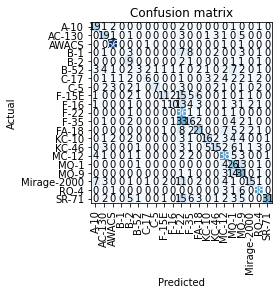

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

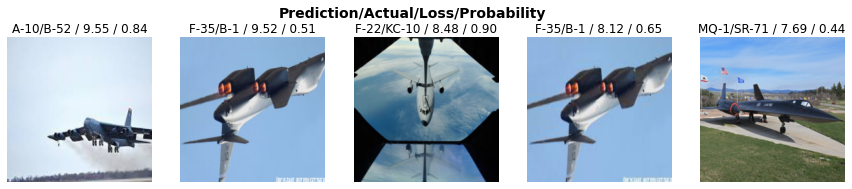

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.lr_find()

RuntimeError: ignored

In [ ]:
learn.fine_tune(6, 3e-6)

epoch,train_loss,valid_loss,error_rate,time
0,1.227662,1.698599,0.522222,00:49


epoch,train_loss,valid_loss,error_rate,time
0,1.233468,1.700487,0.522222,00:51
1,1.224796,1.691434,0.512222,00:51
2,1.213903,1.687618,0.511111,00:51
3,1.241141,1.683995,0.508889,00:51
4,1.225886,1.690052,0.507778,00:51
5,1.215016,1.674876,0.512222,00:51
